<a href="https://colab.research.google.com/github/nttran8/Clothing-Review-Analytics/blob/master/Women's_Clothing_Review_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np #Numpy provides fast mathematical function processing
import pandas as pd #Pandas is used for easy indexing and data collecting tools
import matplotlib as mpl #Machine learning libraries
import matplotlib.pyplot as plt
import seaborn as sns #Import library to create a heatmap
%matplotlib inline

In [0]:
reviewData=pd.read_csv("https://raw.githubusercontent.com/nttran8/Clothing-Review-Analytics/master/Womens%20Clothing%20E-Commerce%20Reviews.csv")
#Data import

In [6]:
reviewData.head()
#Preview data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
reviewData.columns.values
#Prints out all columns

array(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text',
       'Rating', 'Recommended IND', 'Positive Feedback Count',
       'Division Name', 'Department Name', 'Class Name'], dtype=object)

In [10]:
reviewData.shape
#(# of rows and columns in the dataset)

(23486, 11)

In [12]:
reviewData.isnull().values.any()
#Checks if data has Null/NAN values
#True means yes, there are Null/NAN values
#We have to perform further ETL

True

In [0]:
reviewData2 = reviewData.dropna()
#Remove all Null/NAN values

In [15]:
reviewData2.fillna(0)
#Replaces all the Null/NAN values with 0 (just in case)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [19]:
reviewData2.isnull().values.any()
#Recheck our new cleansed dataset for null/NAN values
#False means our dataset is free of null/NAN values and is ready for analytics

False

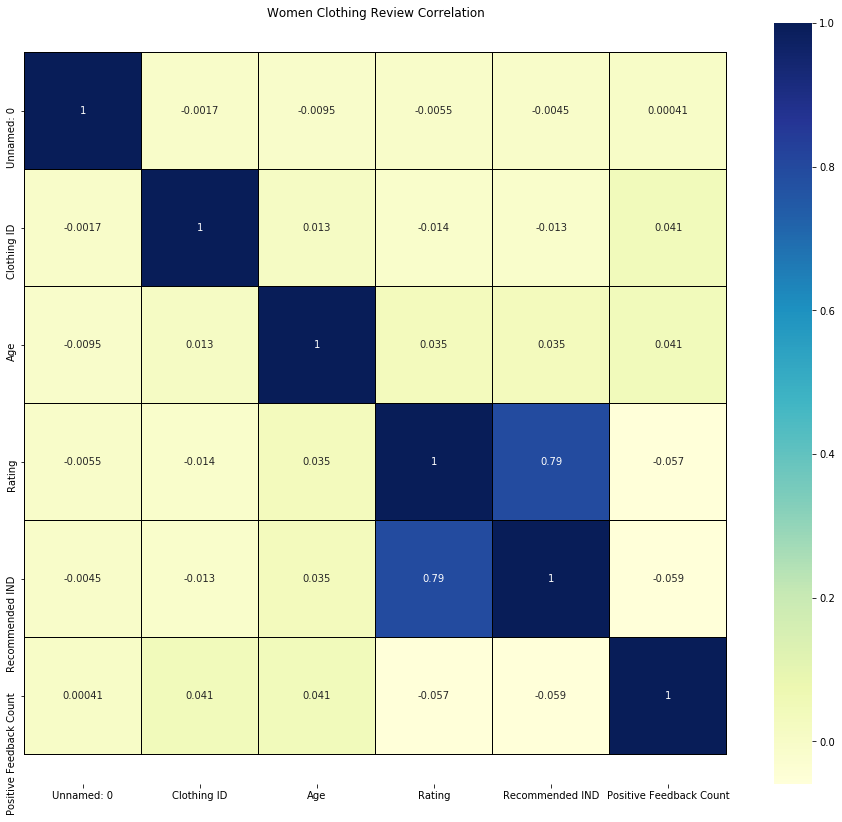

In [29]:
f, ax = plt.subplots(figsize=(17,14))
plt.title('Women Clothing Review Correlation')

#Draw the heatmap using seaborn
sns.heatmap(reviewData2.corr(),linewidths=0.15,vmax=1.0,square=True,cmap='YlGnBu',linecolor='black',annot=True)
b,t = plt.ylim() # discover the values for bottom and top
b += 0.75 # add 0.75 to the bottom
t -= 0.75 # subtract 0.75 from the top
plt.ylim(b, t) # update the ylim(bottom,top) values
plt.show()

#The resulted heatmap shows that the closer it is to 1, the stronger the correlation.
#Let's ignore all the attributes with a correlation of 1 as they are 100% directly correlated to themselves
#Rating and Recommended columns have a .79 strong positive correlation rate - meaning we can look deeper into how does rating/recommended column effect the other
#We can also see some such as Rating & Clothing ID and Clothing ID & Recommended have a negative correlation - meaning there no correlation of those attributes having effect on each other.